# Part 3.3: Unsupervised Learning - DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that is fundamentally different from k-Means. Instead of partitioning data into a pre-set number of spherical clusters, DBSCAN identifies dense regions of data and groups them into clusters. It is excellent at finding clusters of arbitrary shapes and identifying noise points.

### Key Concepts
- **Core Points**: A point is a core point if it has at least `min_samples` points (including itself) within a distance of `eps`.
- **Border Points**: A point that is within `eps` of a core point but does not have enough neighbors to be a core point itself.
- **Noise Points**: A point that is neither a core point nor a border point.

A cluster is a set of core points, each reachable from one another, along with all the border points of those core points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate moon-shaped data, which is difficult for k-Means
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Training a DBSCAN Model
The two main parameters are `eps` (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).

In [2]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# The label -1 is assigned to noise points
print(f"Cluster labels: {np.unique(labels)}")

Cluster labels: [0 1]


### Visualizing the Clusters

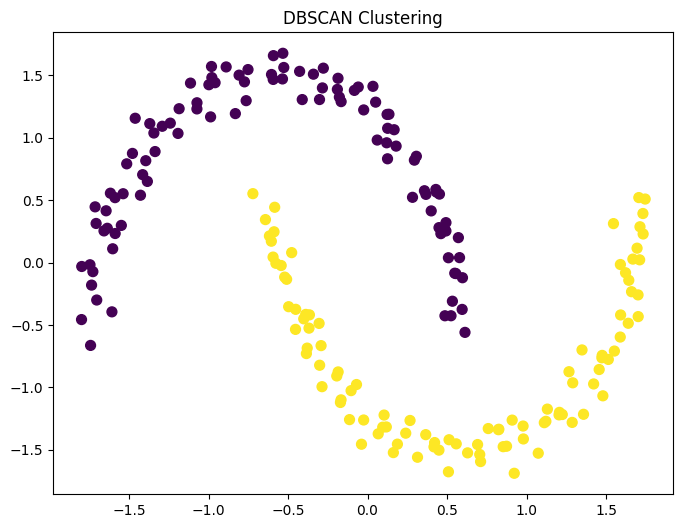

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()